In [64]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

import tensorflow.keras.models as models
import tensorflow.keras.layers as layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [65]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(y_train[0])

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(y_train[0])

print(x_train.shape)
print(x_test.shape)

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
(60000, 28, 28)
(10000, 28, 28)


In [45]:
model = models.Sequential([
    layers.Input(shape=(28,28)),

    layers.Flatten(),

    layers.Dense(128, activation="relu"),
    layers.Dense(64, activation="relu"),

    layers.Dense(10, activation="softmax")
])

model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_7 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, validation_split=0.1, epochs=10)
history = history.history

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7904 - loss: 5.4348 - val_accuracy: 0.9157 - val_loss: 0.3040
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9198 - loss: 0.3077 - val_accuracy: 0.9405 - val_loss: 0.2320
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9423 - loss: 0.2160 - val_accuracy: 0.9465 - val_loss: 0.1915
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9539 - loss: 0.1607 - val_accuracy: 0.9585 - val_loss: 0.1392
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9583 - loss: 0.1423 - val_accuracy: 0.9627 - val_loss: 0.1304
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9606 - loss: 0.1367 - val_accuracy: 0.9633 - val_loss: 0.1389
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9708 - loss: 0.1023 - val_accuracy: 0.9628 - val_loss: 0.1447
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9710 - loss: 0.1000 - 

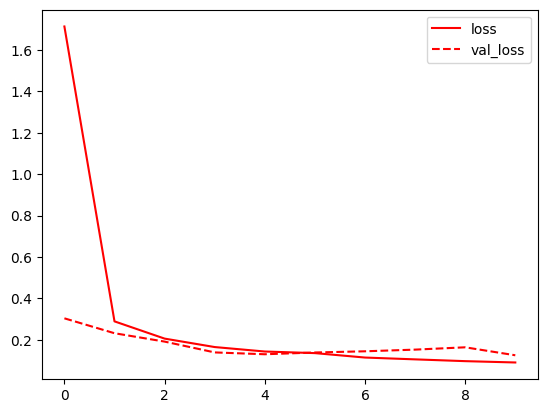

In [47]:
plt.plot(history["loss"], "r", label="loss")
plt.plot(history["val_loss"], "r--", label="val_loss")
plt.legend()

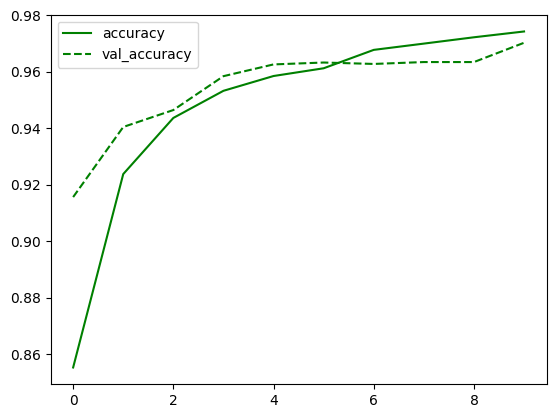

In [48]:
plt.plot(history["accuracy"], "g", label="accuracy")
plt.plot(history["val_accuracy"], "g--", label="val_accuracy")
plt.legend()

In [49]:
model.weights

[<Variable path=sequential_7/dense_21/kernel, shape=(784, 128), dtype=float32, value=[[ 0.0692886   0.04580677  0.08028825 ... -0.04440505 -0.06344073
    0.0015891 ]
  [ 0.06815799  0.00586401  0.01476601 ... -0.01211695 -0.01025042
    0.01533134]
  [ 0.01155852  0.03052989 -0.05364856 ...  0.01222847  0.03185569
    0.01898704]
  ...
  [-0.00957128 -0.03110898 -0.00227488 ...  0.03712476 -0.04314736
   -0.01827002]
  [-0.03792995 -0.01378307  0.00251146 ... -0.05353037  0.0445682
   -0.07749717]
  [ 0.05330103 -0.01635204  0.08032072 ...  0.07383048 -0.04092139
   -0.00702968]]>,
 <Variable path=sequential_7/dense_21/bias, shape=(128,), dtype=float32, value=[-1.39920235e-01  3.25543620e-02 -8.15529749e-02 -1.69097722e-01
  -6.84282258e-02 -2.81808265e-02 -7.39183044e-03 -6.32362068e-02
  -2.49445308e-02 -5.82561567e-02 -8.47685412e-02 -2.23725121e-02
  -1.62642431e-02 -1.51863238e-02 -7.76802674e-02 -2.87116263e-02
  -4.29871269e-02  4.08386178e-02 -1.76329296e-02 -2.00574659e-02
  

In [67]:
noise_factor = 0.5
noisy_x_train = x_train + noise_factor * np.random.normal(loc=0, scale=1, size=x_train.shape)
noisy_x_test = x_test + noise_factor * np.random.normal(loc=0, scale=1, size=x_test.shape)

noisy_x_train = np.clip(noisy_x_train, 0, 1)
noisy_x_test = np.clip(noisy_x_test, 0, 1)

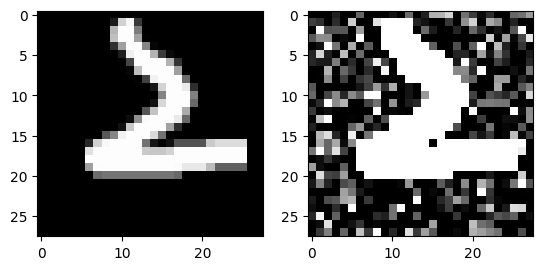

In [69]:
sample = 24591

plt.subplot(1, 2, 1)
plt.imshow(x_train[sample].reshape(28, 28), cmap='gray')

plt.subplot(1, 2, 2)
plt.imshow(noisy_x_train[sample].reshape(28, 28), cmap='gray')

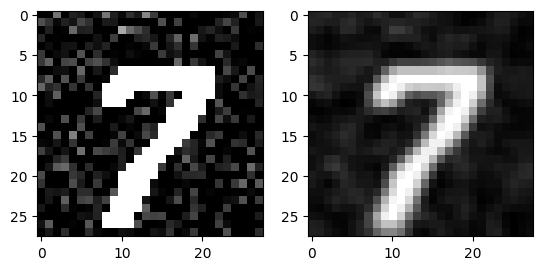

In [63]:
import cv2 as cv

plt.subplot(1, 2, 1)
plt.imshow(noisy_x_train[sample].reshape(28, 28), cmap='gray')

plt.subplot(1, 2, 2)
plt.imshow(cv.GaussianBlur(noisy_x_train[sample], (3,3), 0,1), cmap='gray')

In [74]:
# Create Model
model = models.Sequential([
    # Input Layer
    layers.Input(shape=(28,28)),
    layers.Flatten(),

    # Hidden Layers
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(512, activation='relu'),

    # Output Layers
    layers.Dense(784, activation='relu'),
    layers.Reshape((28, 28))
])

model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_11 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 784)            │       402,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_6 (Reshape)             │ (None, 28, 28)         │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,132,944 (4.32 MB)

 Trainable params: 1,132,944 (4.32 MB)

 Non-trainable params: 0 (0.00 B)

In [75]:
model.compile(loss='categorical_crossentropy', optimizer='adam' )

In [76]:
# Train
history = model.fit(noisy_x_train, x_train, epochs=20,batch_size=200)

Epoch 1/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 4309.2290
Epoch 2/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 3283.3953
Epoch 3/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3233.0198
Epoch 4/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3295.1680
Epoch 5/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: nan
Epoch 6/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: nan
Epoch 7/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: nan
Epoch 8/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: nan
Epoch 9/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 3181.4304
Epoch 10/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: nan
Epoch 11/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: nan
Epoch 12/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: nan
Epoch 13/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: nan
Epoch 14/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: nan
Epoch 15/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: nan
Epoc

In [14]:
from sklearn.metrics import classification_report

# Test, Evaluate
y_pred = model.predict(noisy_x_test)


# print(classification_report(x_test, y_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


ValueError: unknown is not supported

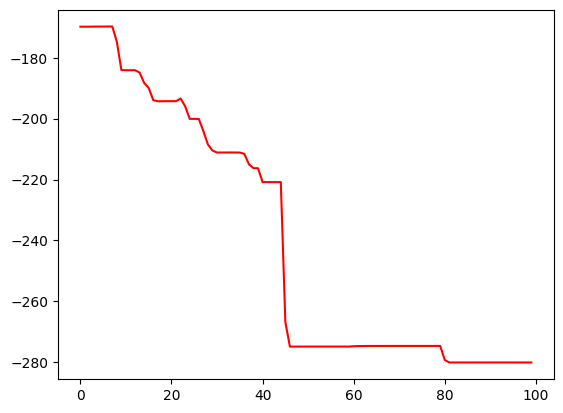

In [18]:
history = history.history

plt.plot(history["loss"], "r")

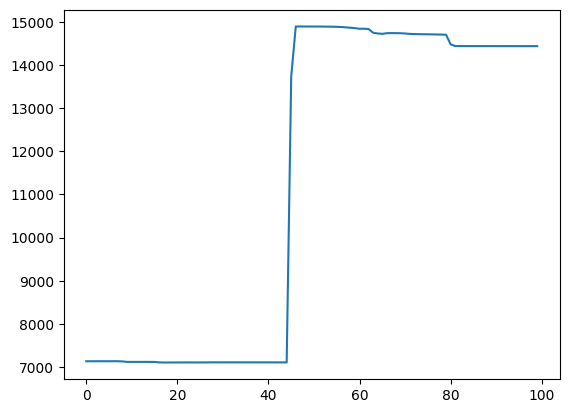

In [16]:
plt.plot(history["mse"])

In [ ]:
# classification - digit detector